In [1]:
import gmaps
import json
import requests
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from  citipy import citipy
import matplotlib.pyplot as plt
from scipy import stats
from config import api_key
import matplotlib.pyplot as plt
import requests
from census import Census
import gmaps
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as st

UnicodeDecodeError: 'charmap' codec can't decode byte 0x8d in position 157: character maps to <undefined>

In [2]:

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [3]:
abnb_data = pd.read_csv("Resources/airbnb_data.csv")

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (4) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [4]:

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [5]:
abnb2 = abnb_data.drop(['neighbourhood_group', 'id', 'host_id', 'host_name', 'calculated_host_listings_count', 'last_review'], axis=1)
abnb2_df = abnb2.drop(abnb2[abnb2['room_type'] == 'Private room'].index)
abnb2_df['city'] = abnb2_df['city'].replace({'Broward County':'Fort Lauderdale','Clark County':'Las Vegas','New York City':'New York','San Clara Country':'San Jose','San Mateo County':'San Mateo','Santa Cruz County':'Santa Cruz','Twin Cities MSA':'Twin Cities','Washington D.C.':'Washington'})
abnb_df = abnb2_df.drop(abnb2_df[(abnb2_df['city'] == 'Hawaii') | (abnb2_df['city'] == 'Rhode Island') | (abnb2_df['city'] == 'Twin Cities')].index)

abnb_df = abnb_df[['city', 'name', 'neighbourhood', 'latitude', 'longitude', 'room_type', 'price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'availability_365']]
abnb_df.rename(columns={'city': 'City', 'name': 'Property Name', 'neighbourhood': 'Neighborhood', 'latitude': 'Latitude', 'longitude': 'Longitude', 'room_type': 'Room Type', 'price': 'Price', 'minimum_nights': 'Minimum Nights', 'number_of_reviews': 'Number of Reviews', 'reviews_per_month': 'Reviews per Month', 'availability_365': 'Availability (days per year)'}, inplace=True)

abnb_df


,City,Property Name,Neighborhood,Latitude,Longitude,Room Type,Price,Minimum Nights,Number of Reviews,Reviews per Month,Availability (days per year)
1,Asheville,French Chic Loft,28801,35.597790,-82.555400,Entire home/apt,470,1,114,1.03,288
2,Asheville,Walk to stores/parks/downtown. Fenced yard/Pet...,28801,35.606700,-82.555630,Entire home/apt,75,30,89,0.81,298
3,Asheville,Cottage! BonPaul + Sharky's Hostel,28806,35.578640,-82.595780,Entire home/apt,90,1,267,2.39,0
5,Asheville,Terrace Cottage,28804,35.618560,-82.552760,Entire home/apt,134,7,54,0.49,294
8,Asheville,"Private, peaceful, and free goat therapy",28805,35.619290,-82.481140,Entire home/apt,71,28,537,5.01,207
...,...,...,...,...,...,...,...,...,...,...,...
226025,Washington,"DC Hidden In Plain ""Site""","Downtown, Chinatown, Penn Quarters, Mount Vern...",38.903880,-77.029730,Entire home/apt,104,1,0,NaN,99
226026,Washington,DC 3 BR w/ screen porch 3 blck to metro w/ par...,"Brookland, Brentwood, Langdon",38.920820,-76.990980,Entire home/apt,151,2,0,NaN,300
226027,Washington,Charming Penthouse Apt w/ Rooftop Terrace in L...,"Shaw, Logan Circle",38.911170,-77.033540,Entire home/apt,240,2,0,NaN,173
226028,Washington,Adams Morgan/Nat'l Zoo 1 BR Apt #32,"Kalorama Heights, Adams Morgan, Lanier Heights",38.926630,-77.044360,Entire home/apt,60,21,0,NaN,362


In [6]:
Cities = []
for city in abnb_df['City']:
    if city not in Cities:
        Cities.append(city)

In [7]:
cities = [city.lower() for city in Cities]

In [8]:
states = ['NC', 'TX', 'MA', 'FL', 'MA', 'IL', 'NV', 'OH', 'CO', 'NJ', 'CA', 'TN', 'LA', 'NY', 'CA', 'CA', 'OR', 'OR', 'CA', 'CA', 'CA', 'CA', 'CA', 'WA', 'DC']

In [9]:
loop_df = pd.DataFrame({
    'city': cities,
    'City': Cities,
    'State': states
})

loop_df['Population'] = ''

In [10]:
for index, row in loop_df.iterrows():
    city = row["city"]
    City = row["City"]
    state = row["State"]
    url = f'http://public.opendatasoft.com/api/records/1.0/search/?dataset=cities-and-towns-of-the-united-states%40public&q={city}&facet=name&facet=state&refine.name={City}&refine.state={state}'
    response = requests.get(url).json()
    print(f"Searching population record for {city}")
    
    try:
        loop_df.loc[index, "Population"] = response['records'][0]['fields']['pop_2010']
    
        print(f"{city}'s population: {response['records'][0]['fields']['pop_2010']}")
    
        print('________________________________________________')
    
    except (KeyError, IndexError):
        print(f"Population for {city} not found... Continue scanning.")
        
        print('________________________________________________')

Searching population record for asheville
asheville's population: 83393
________________________________________________
Searching population record for austin
austin's population: 790390
________________________________________________
Searching population record for boston
boston's population: 617594
________________________________________________
Searching population record for fort lauderdale
fort lauderdale's population: 165521
________________________________________________
Searching population record for cambridge
cambridge's population: 105162
________________________________________________
Searching population record for chicago
chicago's population: 2695598
________________________________________________
Searching population record for las vegas
las vegas's population: 583756
________________________________________________
Searching population record for columbus
columbus's population: 787033
________________________________________________
Searching population record fo

In [11]:
graphs_draft_df = abnb_df.groupby('City').mean().reset_index()
graphs_draft_df['Population'] = loop_df['Population']
graphs_draft_df['State'] = loop_df['State']
graphs_df = graphs_draft_df[['City', 'State', 'Population', 'Latitude', 'Longitude', 'Price', 'Minimum Nights', 'Number of Reviews', 'Reviews per Month', 'Availability (days per year)']]
graphs_df['Population'] = pd.to_numeric(graphs_df['Population'], errors='coerce')

## Create bar graph to show population by city

NameError: name 'plt' is not defined

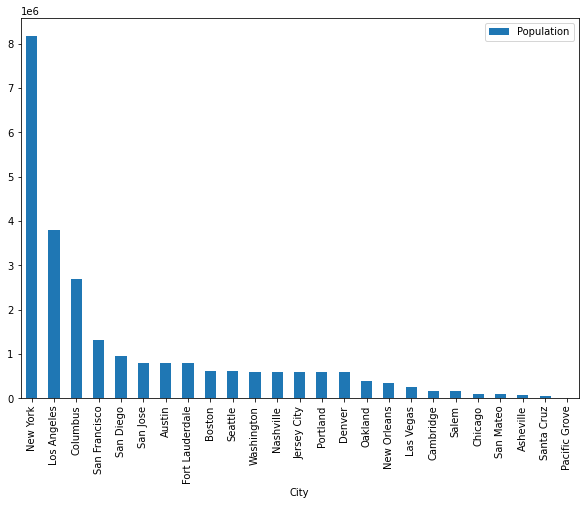

In [12]:
sorted_by_pop = graphs_df.sort_values(by='Population', ascending=False)

pop_city = sorted_by_pop[['City', 'Population']]
pop_city = pop_city.set_index('City')

pop_city.plot(kind="bar", figsize=(10,7))

# Set a title for the chart
plt.title('Population by City')
plt.xlabel("Cities")
plt.ylabel("Population (in millions)")
plt.show()
plt.tight_layout()

In [13]:
# Set x axis and tick locations
x_axis = np.arange(len(sorted_by_pop))
tick_locations = [value for value in x_axis]

# Create a list indicating where to write x labels and set figure size to adjust for space
plt.figure(figsize=(25,3))
plt.bar(x_axis, sorted_by_pop['Population'], color='r', alpha=0.5, align="center")
plt.xticks(tick_locations, sorted_by_pop['City'], rotation="vertical")

# Set x and y limits
plt.xlim(-0.75, len(x_axis))
plt.ylim(0, max(sorted_by_pop['Population'])+10)

# Set a Title and labels
plt.title('Population by City')
plt.xlabel("Cities")
plt.ylabel("Population (in millions)")

# Save our graph and show the grap
plt.tight_layout()
plt.savefig('Resources/pop_by_city.png')
plt.show()

NameError: name 'plt' is not defined

In [14]:
# For the first example, determine which pairs of factors are correlated. 
plt.scatter(pop_city.iloc[:,1],pop_city.iloc[:,8])
plt.xlabel('Income Per Capita')
plt.ylabel('Population')
plt.show()

NameError: name 'plt' is not defined